In [253]:
import numpy as np
import torch
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader

torch.random.manual_seed(20092024)

class DiabetesDataset(Dataset):
    def __init__(self, file):
        self.features = []
        self.labels = []
        with open(file, 'r') as f:
            for line in f:
                values = line.strip().split(' ')
                self.labels.append(float(values[0]))
                X = torch.empty(len(values)-1).fill_(torch.nan)
                for v in values[1:]:
                    s = v.split(':')
                    X[int(s[0])-2] = float(s[1])
                self.features.append(X)
        
        counts = {}
        for f in self.features:
            l = str(len(f))
            if l in counts:
                counts[l] += 1
            else:
                counts[l] = 1
        
        print(counts)

        for i in reversed(range(len(self.features))):
            if len(self.features[i]) != 8:
                self.features.pop(i)
                self.labels.pop(i)

    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [254]:
dataset = DiabetesDataset('diabetes_scale.txt')
training_dataset, test_dataset = random_split(dataset, [0.8, 0.2])
num_features = len(dataset[0][0])
print(f"Features: {num_features}")
print(f"Length: {len(dataset)}")
print(dataset[0])

{'8': 759, '7': 9}
Features: 8
Length: 759
(tensor([ 0.4874,  0.1803, -0.2929, -1.0000,  0.0015, -0.5312, -0.0333, -0.2941]), -1.0)


In [255]:
# loader = DataLoader(dataset, batch_size=4, shuffle=True)
# loader_iter = iter(loader)
# features, labels = next(loader_iter)
# print(features)
# print(labels)

In [256]:
class Perceptron():
    weights: torch.Tensor

    def __init__(self, size: int):
        self.weights = torch.ones(size)

    def update(self, learning_rate: float, dataset: Dataset):
        sm = torch.zeros(len(self.weights))
        # print(self.weights)
        for xi, yi in dataset:
            # print(f"xi {xi}")
            # print(f"yi {yi}")

            cond = yi * torch.dot(xi, self.weights)
            indicate = 1 if cond < 0 else 0
            # print(torch.dot(xi, self.weights))
            # print(f"condition {cond}")
            # print(f"indicate {indicate}")
            adjust = yi * xi
            # print(f"adjust {adjust}")

            sm += adjust * indicate
        
        # print(f"sum {sm}")
        self.weights = self.weights + learning_rate * sm
        # print(self.weights)

    def predict(self, new_X: torch.Tensor):
        return np.sign(torch.dot(new_X, self.weights))
    
def test(dataset, perceptron):
    correct = 0
    for xi, yi in dataset:
        yi_pred = perceptron.predict(xi)
        if yi == yi_pred:
            correct += 1
    accuracy = correct/len(dataset)
    return accuracy


In [257]:
perceptron = Perceptron(num_features)

In [258]:
epochs = []
test_accs = []
train_accs = []
t = 0

In [267]:
lr = 0.1
for _ in range(1000):
    perceptron.update(lr, training_dataset)
    if t % 10 == 0:
        test_accuracy = test(test_dataset, perceptron)
        train_accuracy = test(training_dataset, perceptron)
        test_accs.append(test_accuracy)
        train_accs.append(train_accuracy)
        epochs.append(t)
        print(f"t={t} Test Accuracy: {test_accuracy} Train Accuracy: {train_accuracy}")
    t += 1

/tmp/ipykernel_73352/475095290.py:29: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return np.sign(torch.dot(new_X, self.weights))


t=3000 Test Accuracy: 0.6490066225165563 Train Accuracy: 0.6529605263157895
t=3010 Test Accuracy: 0.7019867549668874 Train Accuracy: 0.6990131578947368
t=3020 Test Accuracy: 0.7218543046357616 Train Accuracy: 0.71875
t=3030 Test Accuracy: 0.7483443708609272 Train Accuracy: 0.7615131578947368
t=3040 Test Accuracy: 0.7483443708609272 Train Accuracy: 0.7335526315789473
t=3050 Test Accuracy: 0.7284768211920529 Train Accuracy: 0.7631578947368421
t=3060 Test Accuracy: 0.6357615894039735 Train Accuracy: 0.7154605263157895
t=3070 Test Accuracy: 0.7417218543046358 Train Accuracy: 0.7697368421052632
t=3080 Test Accuracy: 0.6887417218543046 Train Accuracy: 0.6957236842105263
t=3090 Test Accuracy: 0.6158940397350994 Train Accuracy: 0.6875
t=3100 Test Accuracy: 0.6490066225165563 Train Accuracy: 0.6694078947368421
t=3110 Test Accuracy: 0.6754966887417219 Train Accuracy: 0.6776315789473685
t=3120 Test Accuracy: 0.7019867549668874 Train Accuracy: 0.7006578947368421
t=3130 Test Accuracy: 0.50993377483

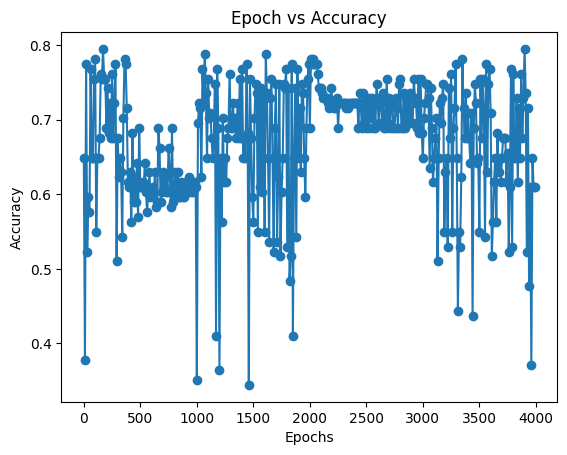

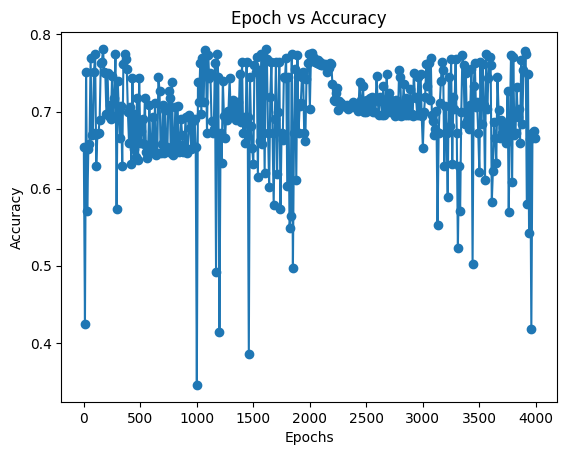

In [268]:
import matplotlib.pyplot as plt

plt.plot(epochs, test_accs, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')

plt.show()

plt.plot(epochs, train_accs, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')

plt.show()